In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("medzip.csv")

In [3]:
df1.head()

,Zip,Median,Pop,Zipcode
0,1001,"56,663","16,445",10010
1,1002,"49,853","28,069",10020
2,1003,"28,462","8,491",10030
3,1005,"75,423","4,798",10050
4,1007,"79,076","12,962",10070


In [5]:
df2 = pd.read_csv("zbp02totals.txt")

In [7]:
df2.head()

,ZIP,NAME,EMPFLAG,EMP,QP1,AP,EST
0,501,"HOLTSVILLE, NY",NaN,40,148,660,11
1,1001,"AGAWAM, MA",I,0,0,0,490
2,1002,"AMHERST, MA",NaN,6866,39616,170725,566
3,1003,"AMHERST, MA",NaN,268,1097,3900,15
4,1004,"AMHERST, MA",NaN,169,1015,4032,23


In [9]:
df3 = pd.read_csv("14zpallagi.csv")

In [10]:
df3.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,850050.0,481840.0,115070.0,240450.0,479900.0,1401930.0,...,389850.0,324575.0,0.0,0.0,0.0,0.0,62690.0,47433.0,744910.0,1964826.0
1,1,AL,0,2,491370.0,200750.0,150290.0,125560.0,281350.0,1016010.0,...,397110.0,950446.0,0.0,0.0,0.0,0.0,70780.0,101969.0,413790.0,1177400.0
2,1,AL,0,3,259540.0,75820.0,142970.0,34070.0,156720.0,589190.0,...,250230.0,1319641.0,0.0,0.0,0.0,0.0,62170.0,132373.0,192050.0,538160.0
3,1,AL,0,4,164840.0,26730.0,125410.0,10390.0,99750.0,423300.0,...,163580.0,1394913.0,0.0,0.0,0.0,0.0,45120.0,124048.0,115470.0,375882.0
4,1,AL,0,5,203650.0,18990.0,177070.0,5860.0,122670.0,565930.0,...,203050.0,3655700.0,610.0,135.0,270.0,66.0,81180.0,387298.0,114380.0,448442.0


In [14]:
df3.std().sort_values(ascending=False).head()

A02650    2.625972e+06
A00100    2.589267e+06
A00101    2.177362e+06
A04800    2.026903e+06
A00200    1.618175e+06
dtype: float64

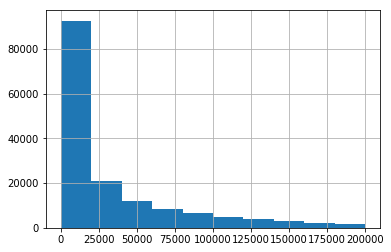

In [36]:
df3[df3["A02650"] < 2e5]["A02650"].hist()

In [39]:
df4 = pd.read_csv("population_by_zip_2000.csv")

In [40]:
df4.head()

,minimum_age,maximum_age,gender,population,zipcode,geo_id
0,10.0,14.0,female,75,39769,8600000US39769
1,85.0,NaN,female,130,44047,8600000US44047
2,30.0,34.0,female,11,42436,8600000US42436
3,22.0,24.0,male,22,99685,8600000US99685
4,67.0,69.0,male,69,04239,8600000US04239


In [45]:
zipcode_cesus = pd.DataFrame()
zipcode_cesus["population"] = df4.groupby("zipcode").sum()["population"]
zipcode_cesus.reset_index(level=0, inplace=True)

In [52]:
def func(x):
    try:
        return int(x)
    except:
        return x
zipcode_cesus["zip"] = zipcode_cesus["zipcode"].apply(lambda x: func(x))

In [56]:
zipcode_census = pd.merge(zipcode_cesus, df2, how='inner',left_on='zip',right_on='ZIP')
zipcode_census.drop("ZIP", axis=1, inplace=True)
zipcode_census.drop(["NAME", "EMPFLAG"], axis=1, inplace=True)

In [62]:
zipcode_census.to_csv("zipcode_census.csv")
#EMP = Total Mid-March Employees
#QP1 = Total First Quarter Payroll($1,000)
#AP = Total Annual Payroll ($1,000)
#EST = Total Number of Establishments